In [16]:
import numpy as np
import cv2
import time
import doctest
import glob

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x = []
masks = []
for m in glob.glob('**/mask*.png', recursive=True):
    masks.append(cv2.imread(m, cv2.IMREAD_GRAYSCALE))
for i in glob.glob('**/image*.png', recursive=True):
    x.append(cv2.imread(i))

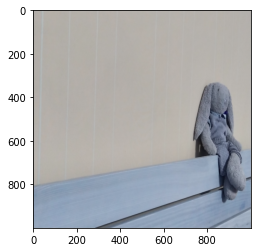

In [4]:
plt.imshow(x[0])

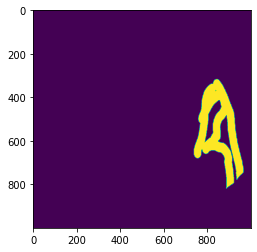

In [5]:
plt.imshow(masks[0])

In [6]:
x[0].shape

(1000, 1000, 3)

True

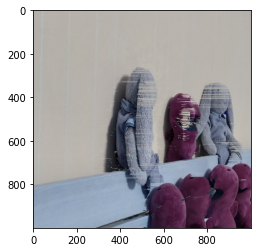

In [48]:
alpha = 255
beta = 1
q = np.array([alpha*(1-np.where(m>0, 1, m)) for m in masks])

# g[k, k', i, j] - represents g_j,j+1(k_j, k_j+1)

g = np.zeros((5,5,1000,999))
for i in range(4):
    for j in range(i+1,5):
        x_diff = np.sum(np.abs(x[i]-x[j]), axis=2)
        g[i,j] = beta*(x_diff[:,:-1]+x_diff[:,1:]) 
        g[j,i] = g[i, j]

        
# fn == 0, fn-1==f1
# f1 == f999
# f0 = min(q0+f999)
f = np.zeros((1000, 5, 1000))
for j in range(998):
    f[j+1] = np.max(q[:,:, j]+f[j]+g[:,:,:,j], axis=1)


# will store best pic to pick from
k_best = np.zeros((1000,1000)).astype(int)
k_best[-1] = np.argmin(q[:,:,-1]+f[-1], axis=0)
for i in range(998, -1, -1):
    g_ = np.take_along_axis(g[:,:,:,i], k_best[i+1][None,None,:], axis=0)[0]
    val = q[:,:,i]+g_+f[i]
    k_best[i]=np.argmin(val, axis=0)

# sum pictures
x = np.array(x)
res = np.take_along_axis(x, k_best.T[None, :,:, None], axis=0)[0]
plt.imshow(res)
cv2.imwrite('3.png', res)


In [42]:
def func():
    """
    >>> a = np.reshape(np.arange(300), (3,10,10))
    >>> b = np.ones((3,3,10,10))
    >>> (a[:,:,-1]+b[:,:,:,-1]).shape
    (3, 3, 10)
    >>> c = np.arange(1,4)[:,None,None]*b[:,:,:,-1]
    >>> idx = np.array([0,1,0,2,0,0,0,0,0,0])
    >>> np.take_along_axis(c, idx[None,None,:], axis=0)[0][0].astype(int)
    array([1, 2, 1, 3, 1, 1, 1, 1, 1, 1])
    >>> np.min(a[:,:,-1]+b[:,:,:,-1], axis=1)[:, 0]
    array([10., 10., 10.])
    >>> (np.min(a[:,:,-1]+b[:,:,:,-1], axis=0)[:, 0].astype(int) == np.array([10, 110, 210])).all()
    True
    """
doctest.testmod(verbose=True)

Trying:
    a = np.reshape(np.arange(300), (3,10,10))
Expecting nothing
ok
Trying:
    b = np.ones((3,3,10,10))
Expecting nothing
ok
Trying:
    (a[:,:,-1]+b[:,:,:,-1]).shape
Expecting:
    (3, 3, 10)
ok
Trying:
    c = np.arange(1,4)[:,None,None]*b[:,:,:,-1]
Expecting nothing
ok
Trying:
    idx = np.array([0,1,0,2,0,0,0,0,0,0])
Expecting nothing
ok
Trying:
    np.take_along_axis(c, idx[None,None,:], axis=0)[0][0].astype(int)
Expecting:
    array([1, 2, 1, 3, 1, 1, 1, 1, 1, 1])
ok
Trying:
    np.min(a[:,:,-1]+b[:,:,:,-1], axis=1)[:, 0]
Expecting:
    array([10., 10., 10.])
ok
Trying:
    (np.min(a[:,:,-1]+b[:,:,:,-1], axis=0)[:, 0].astype(int) == np.array([10, 110, 210])).all()
Expecting:
    True
ok
1 items had no tests:
    __main__
1 items passed all tests:
   8 tests in __main__.func
8 tests in 2 items.
8 passed and 0 failed.
Test passed.


TestResults(failed=0, attempted=8)

In [46]:
np.argmin(q[:,:,0]+f[-1], axis=0)

array([3, 3, 0, 4, 1, 2, 2, 4, 4, 1, 2, 3, 3, 3, 1, 4, 3, 1, 3, 3, 2, 2,
       0, 1, 3, 4, 4, 2, 3, 2, 1, 4, 2, 2, 3, 0, 1, 1, 2, 3, 2, 0, 3, 4,
       4, 2, 2, 2, 2, 0, 4, 3, 2, 1, 3, 0, 0, 1, 2, 1, 2, 3, 1, 1, 2, 1,
       1, 2, 0, 2, 3, 1, 2, 2, 0, 2, 2, 0, 1, 2, 0, 0, 4, 4, 3, 3, 4, 4,
       4, 0, 1, 4, 1, 4, 4, 4, 1, 3, 2, 0, 4, 2, 2, 3, 1, 2, 2, 1, 2, 2,
       1, 0, 3, 1, 2, 1, 0, 2, 3, 0, 2, 1, 4, 1, 0, 4, 4, 0, 4, 4, 0, 2,
       3, 1, 0, 4, 3, 3, 3, 3, 3, 2, 1, 4, 1, 3, 1, 0, 4, 2, 1, 0, 0, 1,
       1, 0, 0, 2, 1, 4, 2, 3, 0, 4, 3, 2, 3, 0, 3, 0, 1, 3, 4, 3, 1, 2,
       3, 4, 1, 3, 1, 1, 4, 3, 4, 4, 2, 0, 2, 3, 2, 2, 4, 4, 0, 0, 0, 1,
       2, 2, 4, 3, 4, 4, 4, 2, 2, 2, 1, 3, 4, 4, 3, 4, 3, 4, 3, 1, 4, 1,
       4, 3, 4, 2, 0, 3, 4, 3, 2, 3, 0, 2, 1, 3, 2, 1, 0, 0, 1, 1, 0, 4,
       3, 2, 2, 2, 3, 1, 2, 2, 2, 3, 3, 3, 2, 3, 2, 3, 1, 4, 3, 1, 0, 2,
       1, 0, 2, 1, 4, 2, 4, 3, 1, 3, 4, 4, 4, 3, 1, 2, 4, 4, 2, 4, 3, 4,
       1, 4, 0, 1, 1, 1, 1, 3, 2, 1, 4, 2, 4, 0, 3,

In [36]:
g[:,:,:,-1].shape

(5, 5, 1000)

In [32]:
c = np.arange(1,4)[:,None,None]*b[:,:,:,-1]
c

array([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]],

       [[2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]],

       [[3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3., 3., 3., 3., 3., 3.]]])

In [44]:
idx = np.array([0,1,0,2,0,0,0,0,0,0])
np.take_along_axis(c, idx[None,None,:], axis=0)

array([[[1., 2., 1., 3., 1., 1., 1., 1., 1., 1.],
        [1., 2., 1., 3., 1., 1., 1., 1., 1., 1.],
        [1., 2., 1., 3., 1., 1., 1., 1., 1., 1.]]])

In [33]:
np.argmin([3,0,8,0])

1

In [18]:
q.shape, g.shape

((5, 1000, 1000), (5, 5, 1000, 999))

In [29]:
a = np.reshape(np.arange(300), (3,10,10))
b = np.ones((3,3,10,10))


In [21]:
a[:,:,-1]+b[:,:,:,-1]

array([[[ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.],
        [110., 120., 130., 140., 150., 160., 170., 180., 190., 200.],
        [210., 220., 230., 240., 250., 260., 270., 280., 290., 300.]],

       [[ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.],
        [110., 120., 130., 140., 150., 160., 170., 180., 190., 200.],
        [210., 220., 230., 240., 250., 260., 270., 280., 290., 300.]],

       [[ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.],
        [110., 120., 130., 140., 150., 160., 170., 180., 190., 200.],
        [210., 220., 230., 240., 250., 260., 270., 280., 290., 300.]]])

In [34]:
np.max(a[:,:,-1]+b[:,:,:,-1], axis=1) 

array([[210., 220., 230., 240., 250., 260., 270., 280., 290., 300.],
       [210., 220., 230., 240., 250., 260., 270., 280., 290., 300.],
       [210., 220., 230., 240., 250., 260., 270., 280., 290., 300.]])

In [23]:
np.max(a[:,:,-1]+b[:,:,:,-1], axis=0)

array([[ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.],
       [110., 120., 130., 140., 150., 160., 170., 180., 190., 200.],
       [210., 220., 230., 240., 250., 260., 270., 280., 290., 300.]])

In [30]:
np.max(q[:,:,999]+g[:,:,:,998], axis=1)

array([[1509., 1018., 1273., ..., 1499., 1507., 1494.],
       [1512., 1019., 1275., ..., 1499., 1507., 1490.],
       [1512.,  759., 1275., ..., 1497., 1507., 1494.],
       [1019., 1019., 1273., ..., 1472., 1457., 1475.],
       [ 514.,  775., 1271., ...,  705.,  737.,  742.]])

In [11]:
q

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
   